In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import os
import os.path as osp
import sys
sys.path.insert(0, osp.abspath(".."))
from utils import *
import seaborn as sns
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


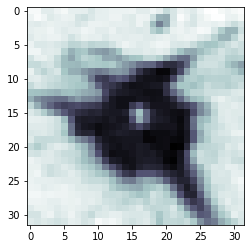

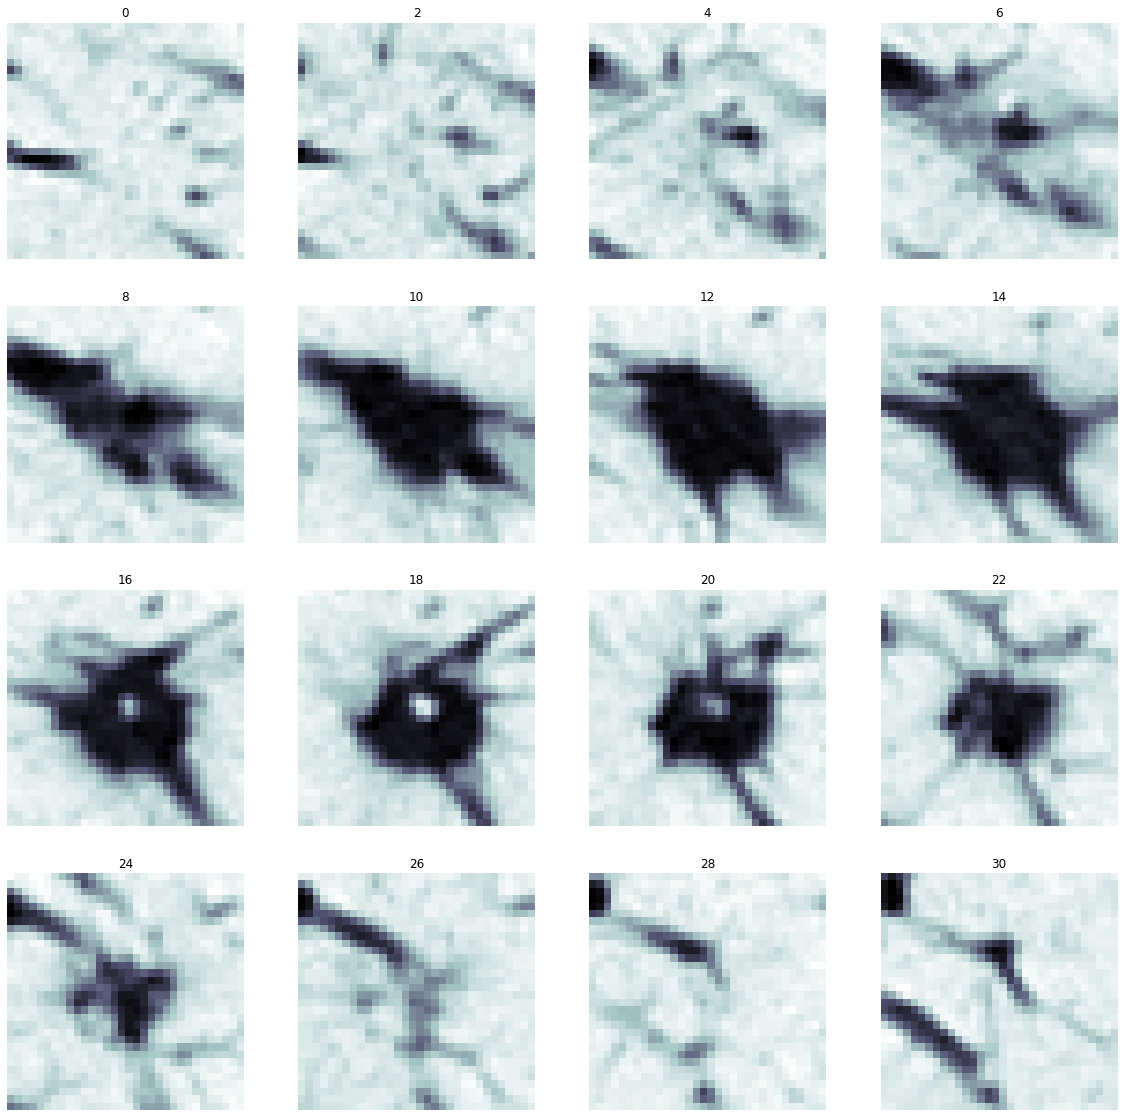

In [2]:
file_path = "/home/hthieu/data/crop/1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149938600000570588203-9-9-9-9-9-9-9-9-9-9-9-9.npy"
nod_npy   = np.load(file_path)
plt.figure(figsize=(4,4))
ax  = plt.gca()
ax.imshow(nod_npy[15,:,:], cmap="bone")
plot_slices(nod_npy[::-1,:,:], 0)

In [8]:
# exp_id  = "nas-model-1-angle-expr-4"
nod_ids, preds, gts, feats, sp_attn_maps = read_test_data("multi-views-expr-4", 4)
incorrect_preds = np.where(preds != gts)[0]

<Figure size 432x288 with 0 Axes>

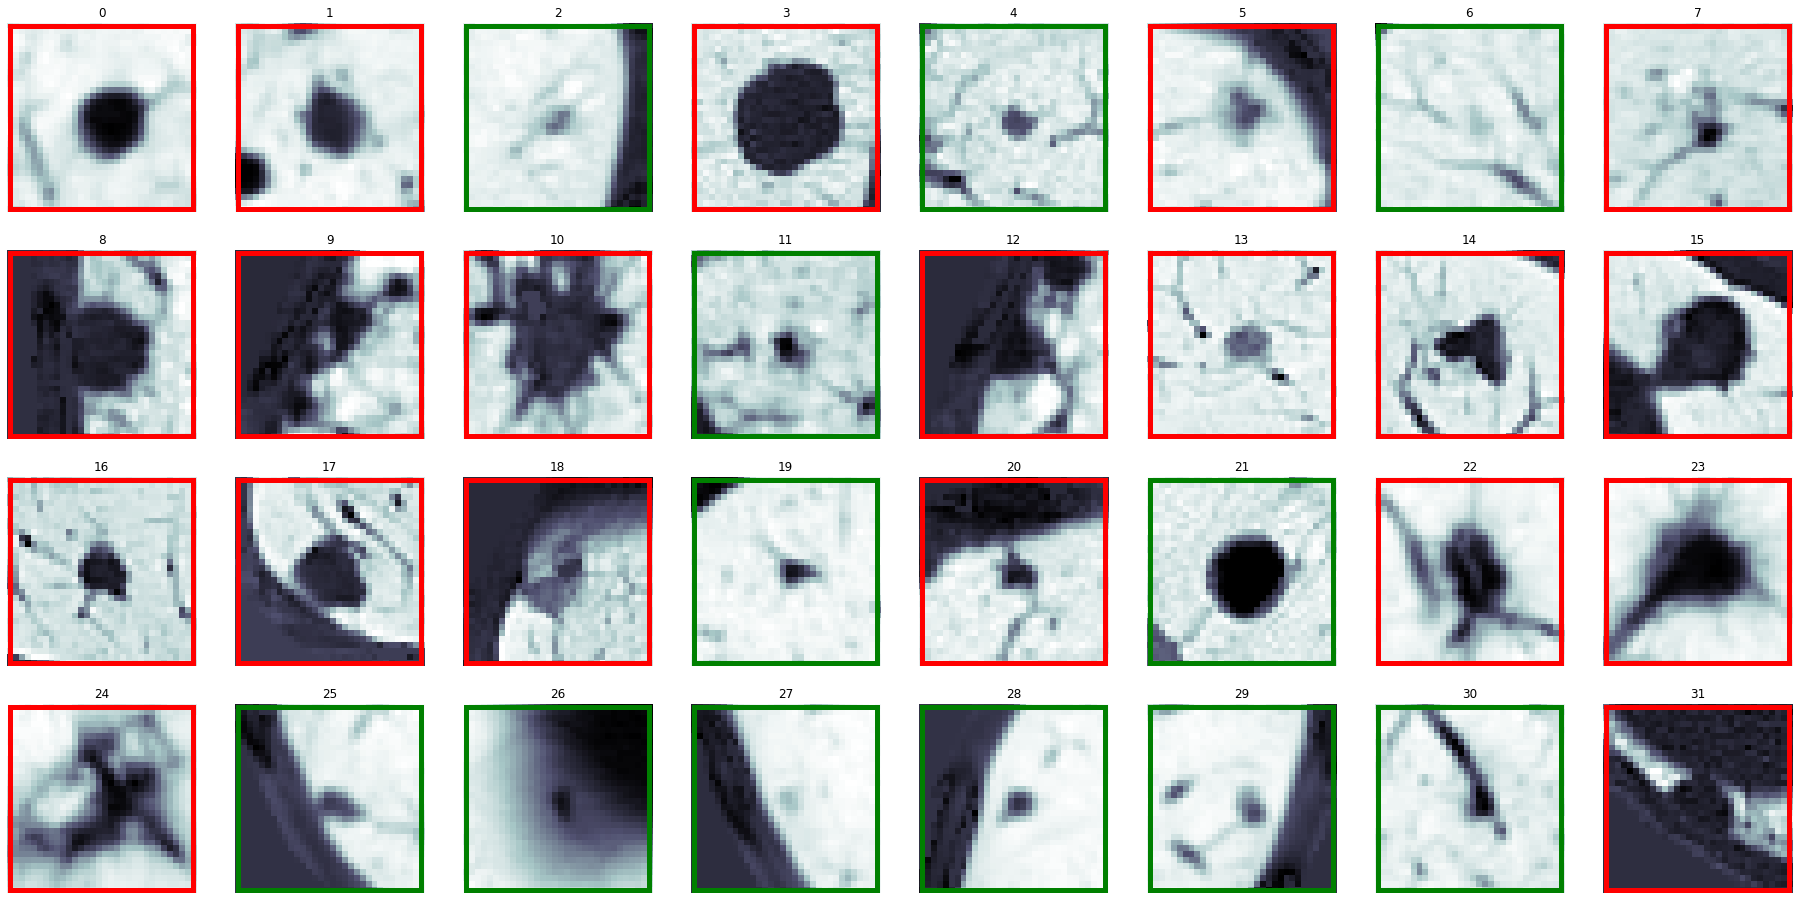

<Figure size 432x288 with 0 Axes>

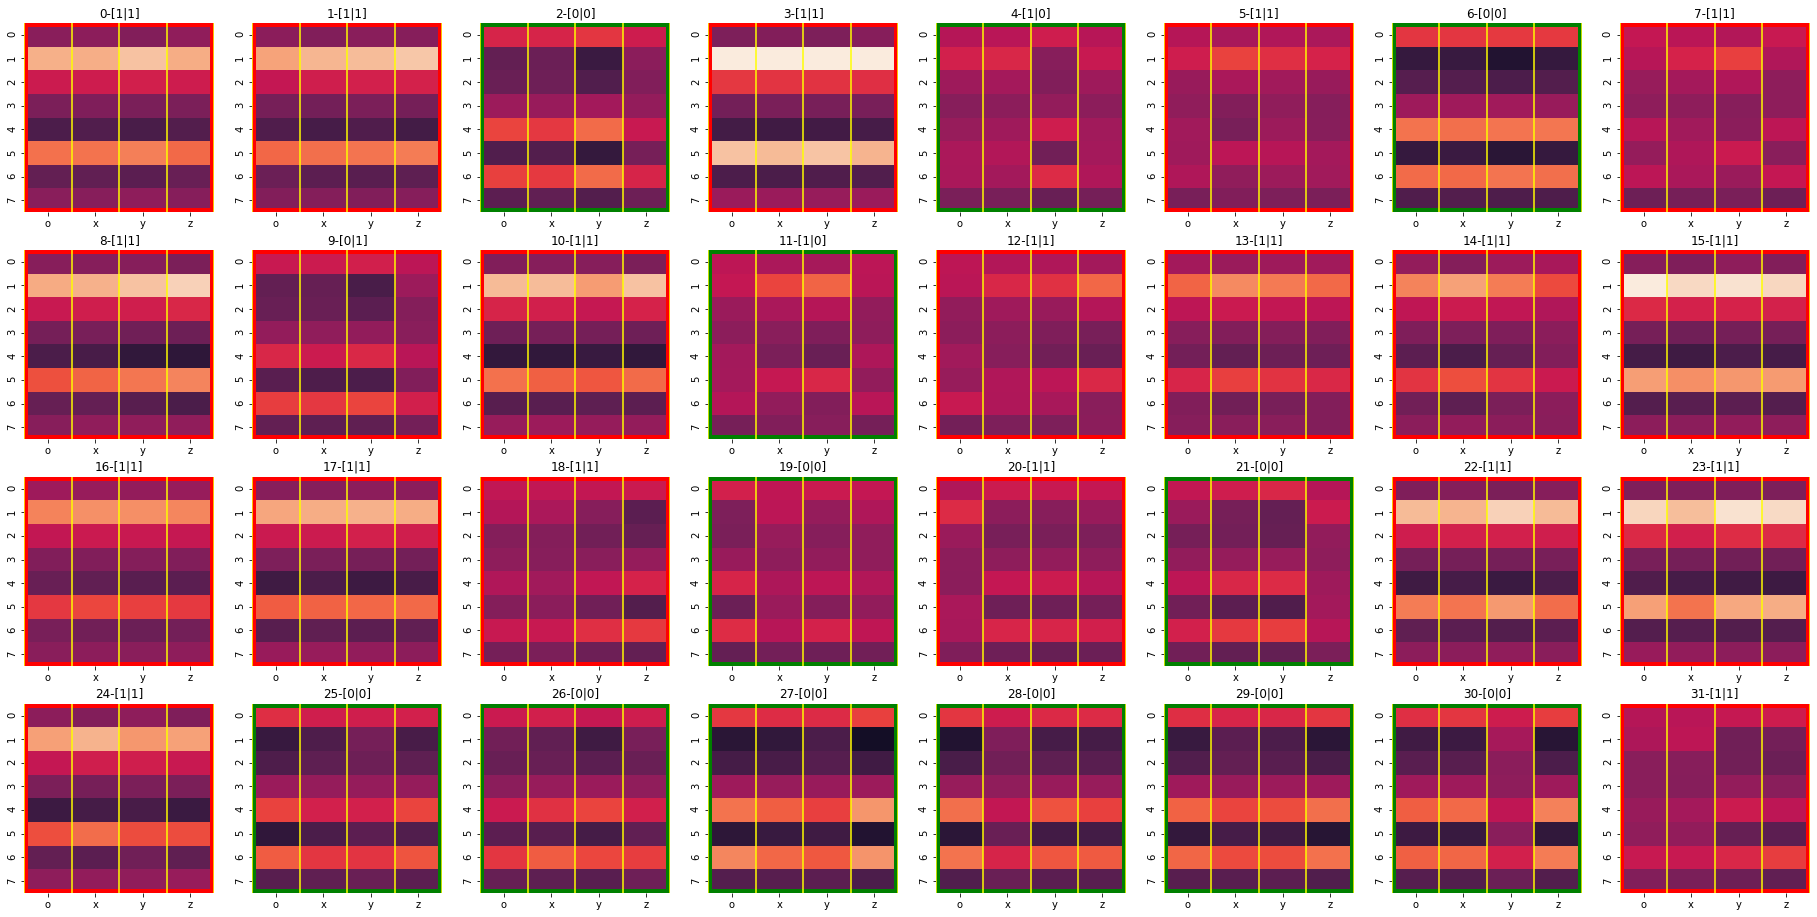

<Figure size 432x288 with 0 Axes>

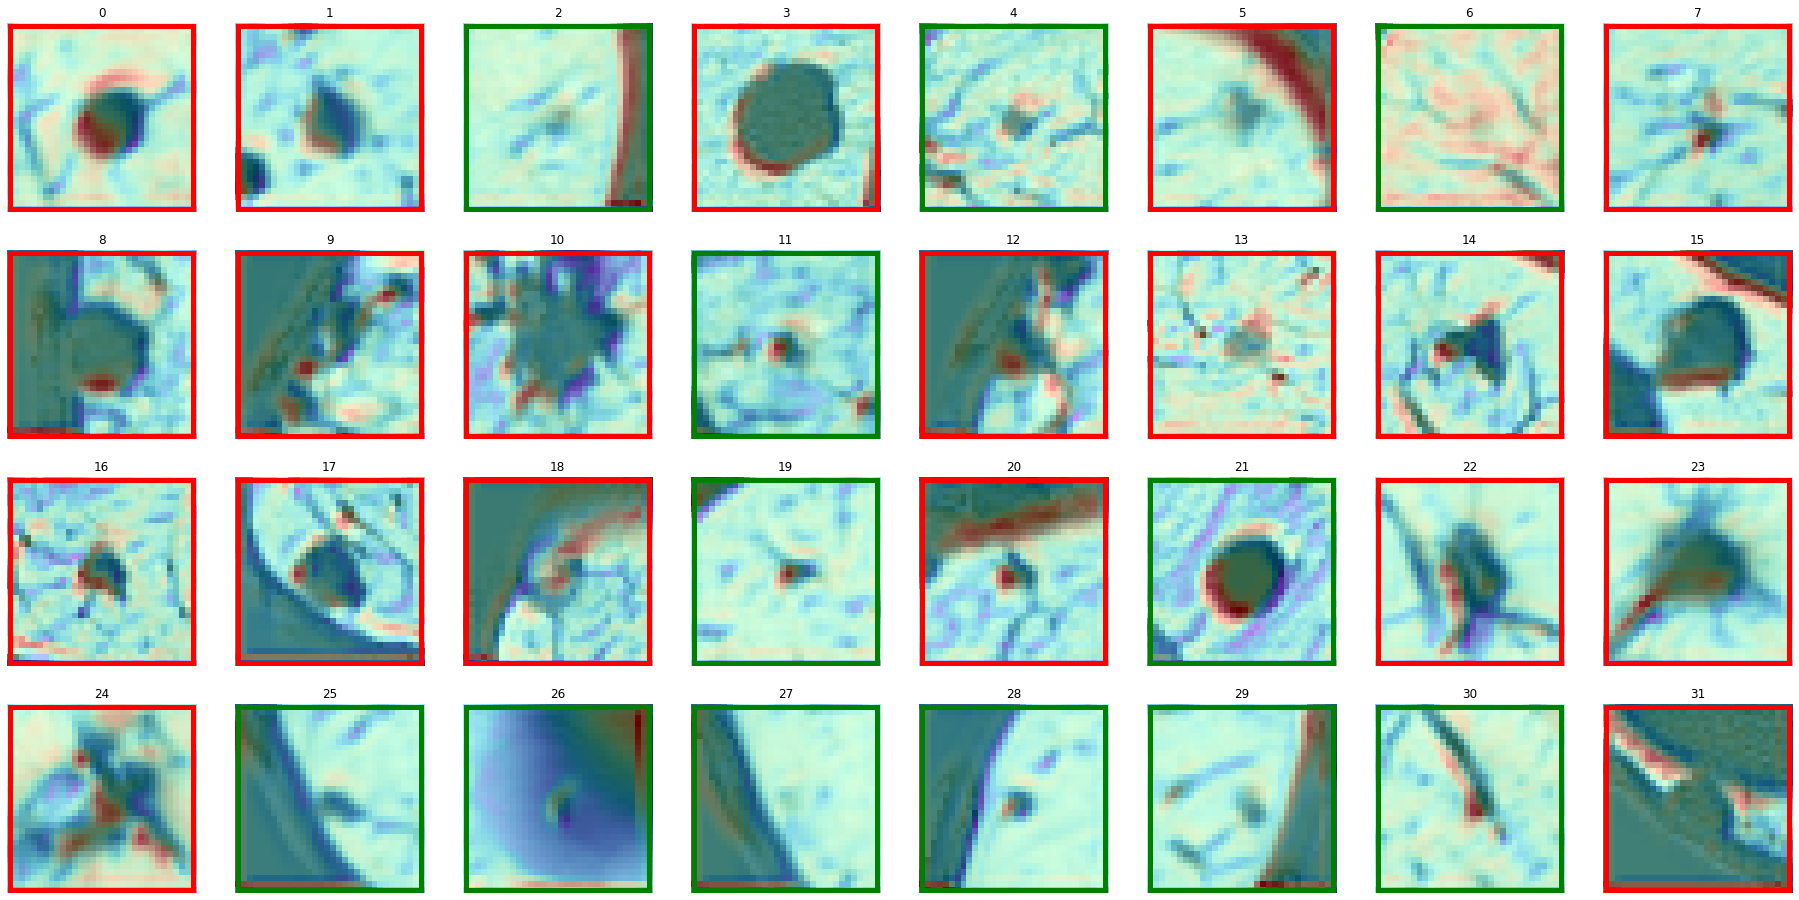

In [13]:
viz_lst = np.arange(32)
#Plot nodule images
plot_imgs_grid(plot_nodule_img, viz_lst , nod_ids, gts, nrows=4, ncols=8)
#Plot features vectors
plot_imgs_grid(plot_feature_vector, viz_lst, feats, preds, gts, nrows=4, ncols=8)
#Plot heat map
plot_imgs_grid(plot_nodule_sp_attention, viz_lst, nod_ids, gts, sp_attn_maps, nrows=4, ncols=8)

<Figure size 432x288 with 0 Axes>

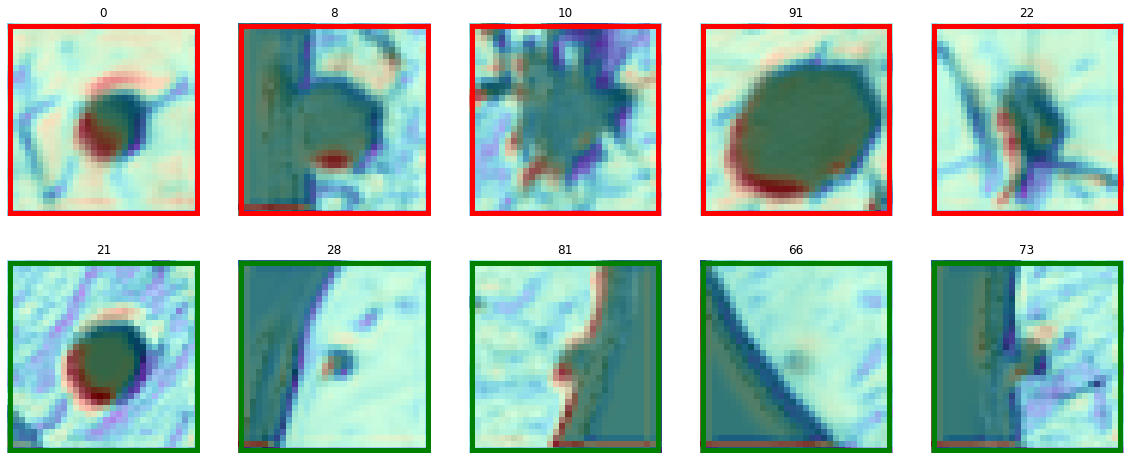

In [18]:
viz_lst= np.array([0, 8, 10, 91, 22, 21, 28, 81, 66, 73])
plot_imgs_grid(plot_nodule_sp_attention, viz_lst, nod_ids, gts, sp_attn_maps, nrows=2, ncols=5)

IndexError: index 100 is out of bounds for axis 0 with size 100

<Figure size 432x288 with 0 Axes>

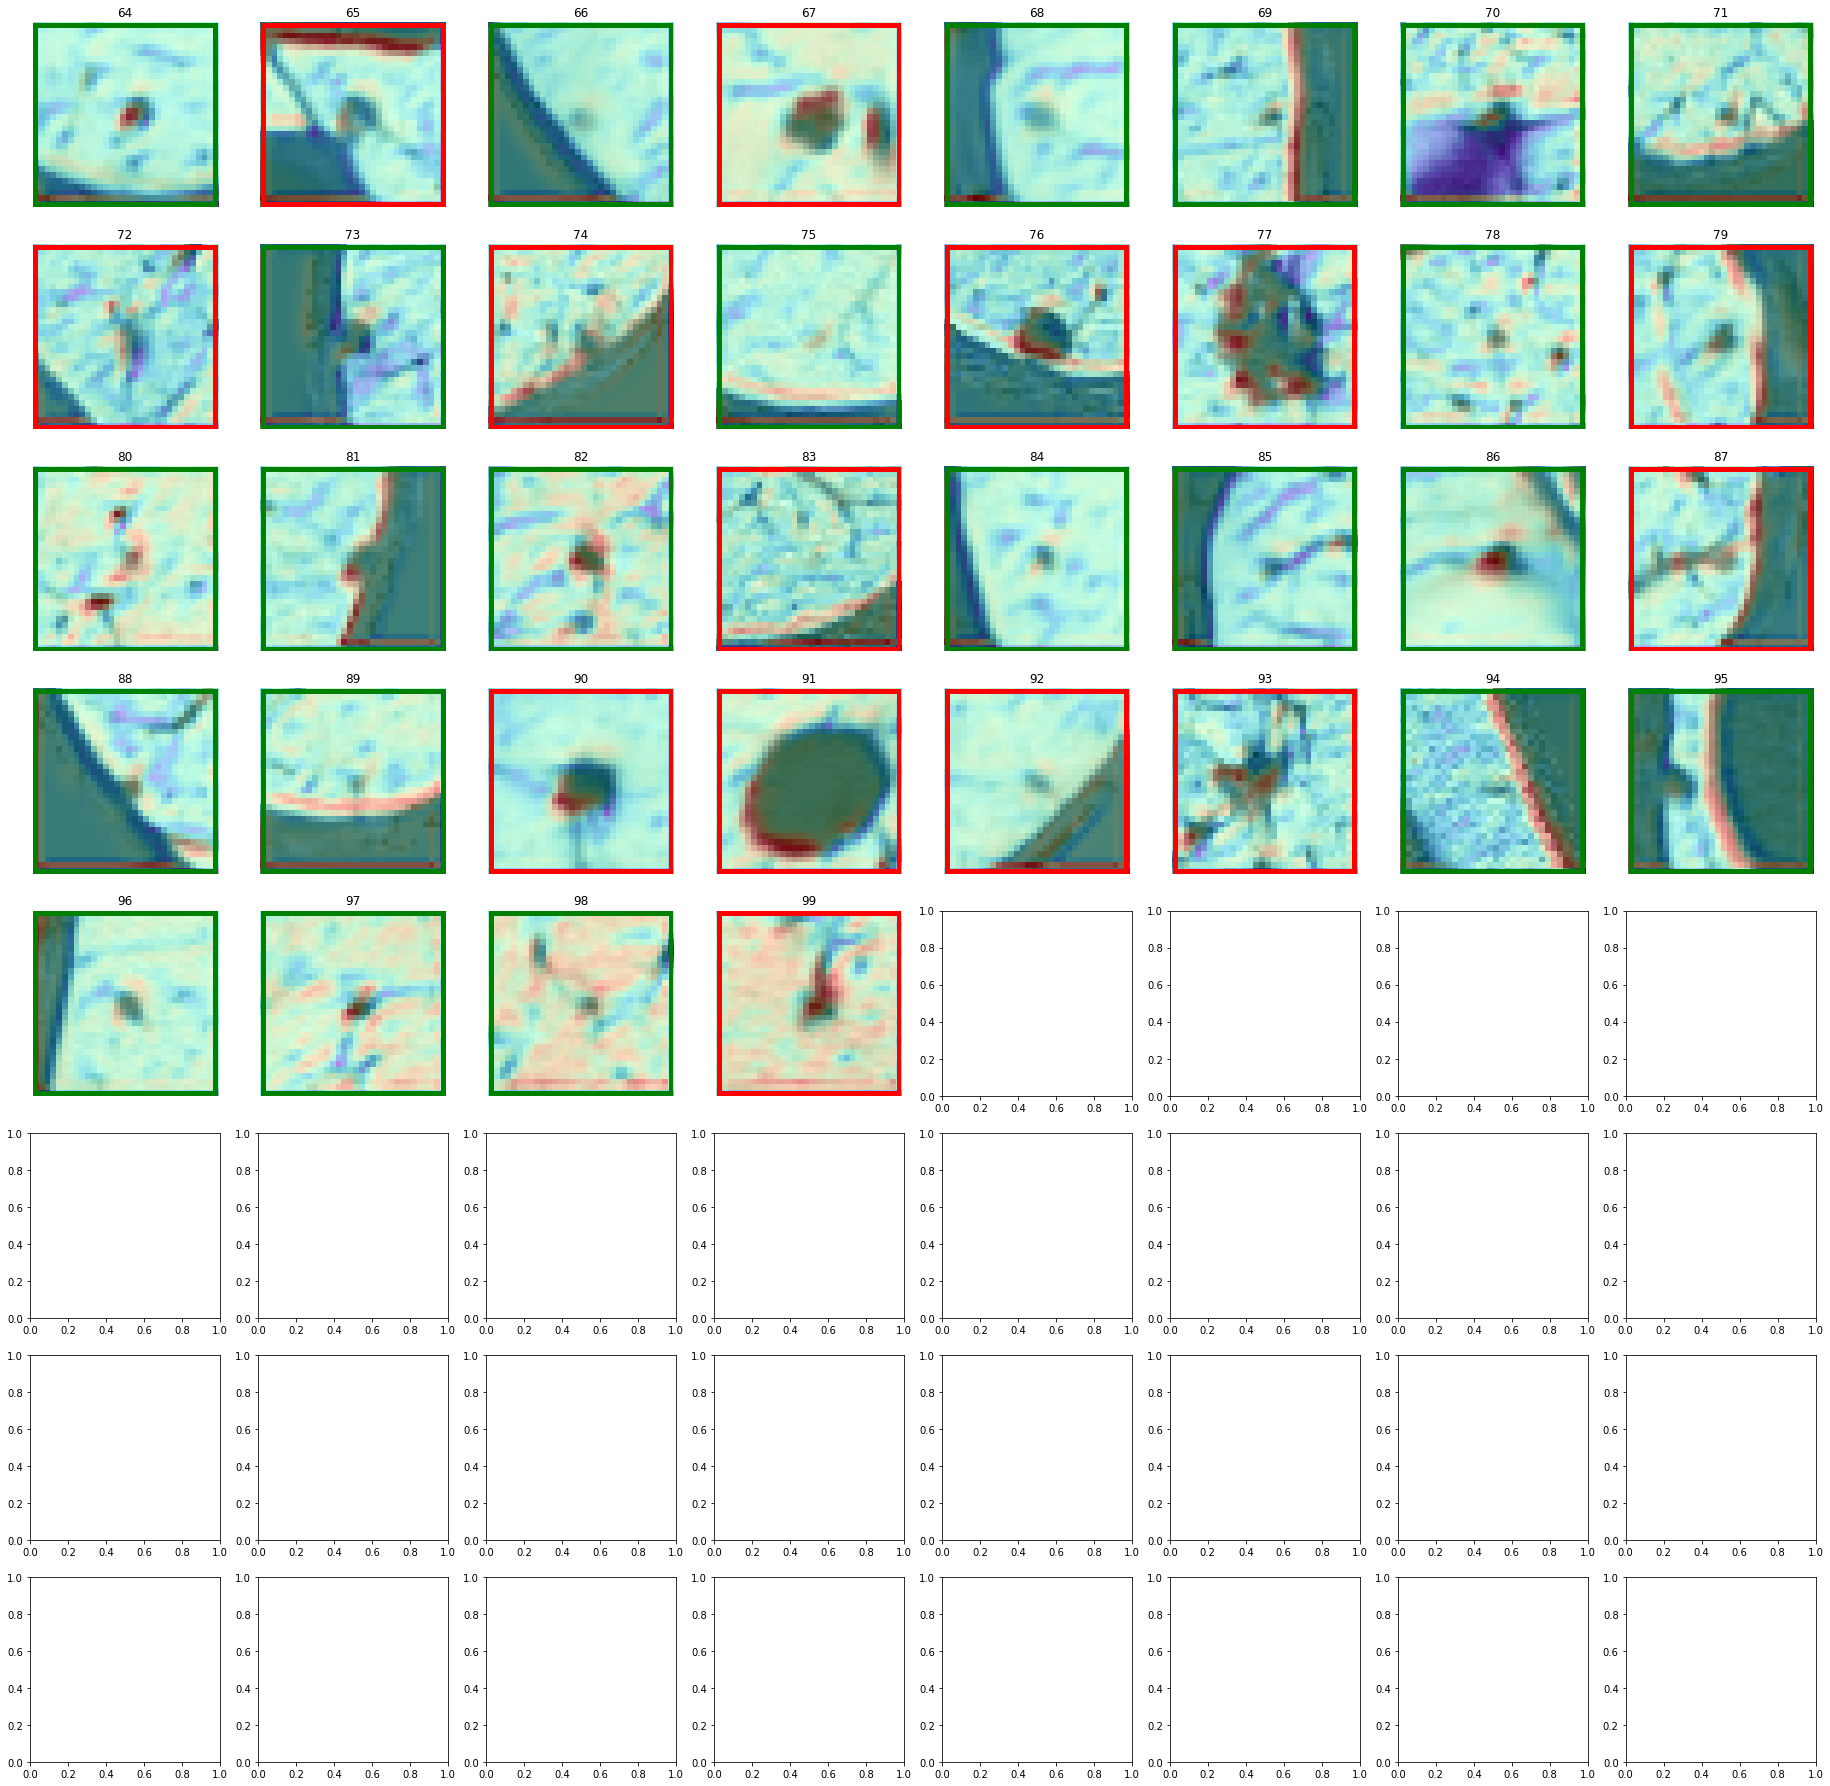

In [14]:
viz_lst = np.arange(64,128)
plot_imgs_grid(plot_nodule_sp_attention, viz_lst, nod_ids, gts, sp_attn_maps, nrows=8, ncols=8)

<Figure size 432x288 with 0 Axes>

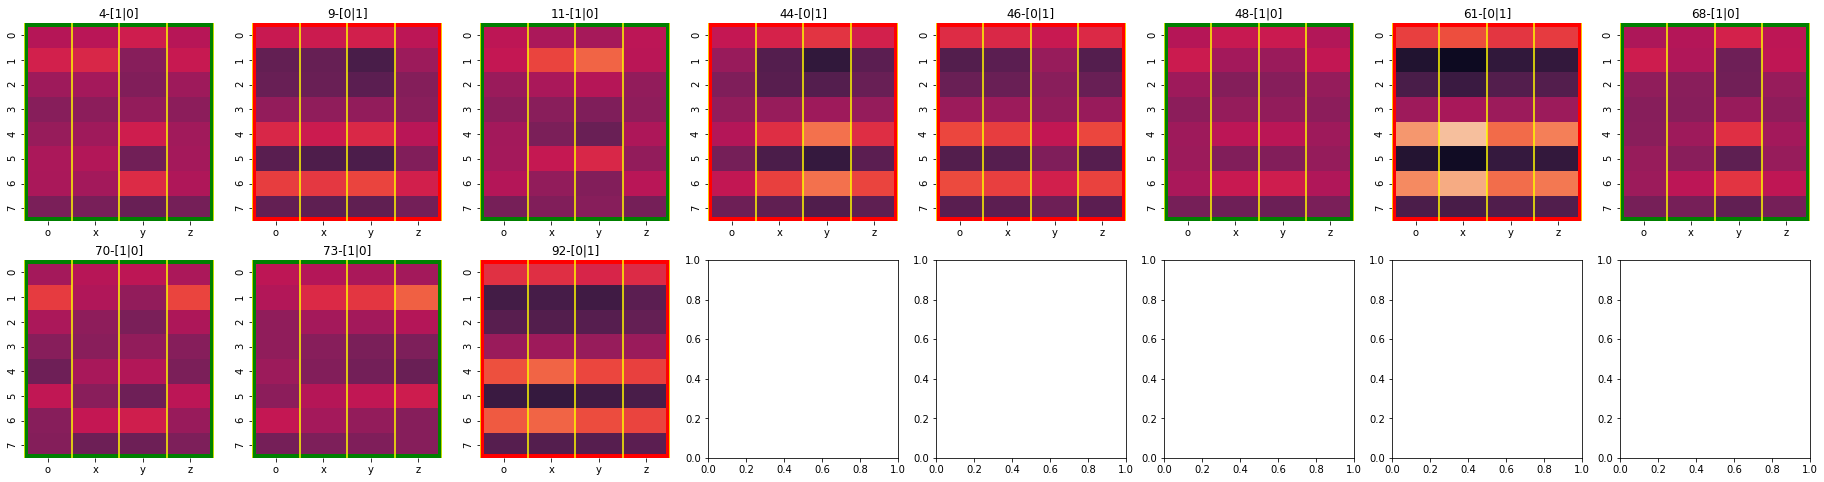

<Figure size 432x288 with 0 Axes>

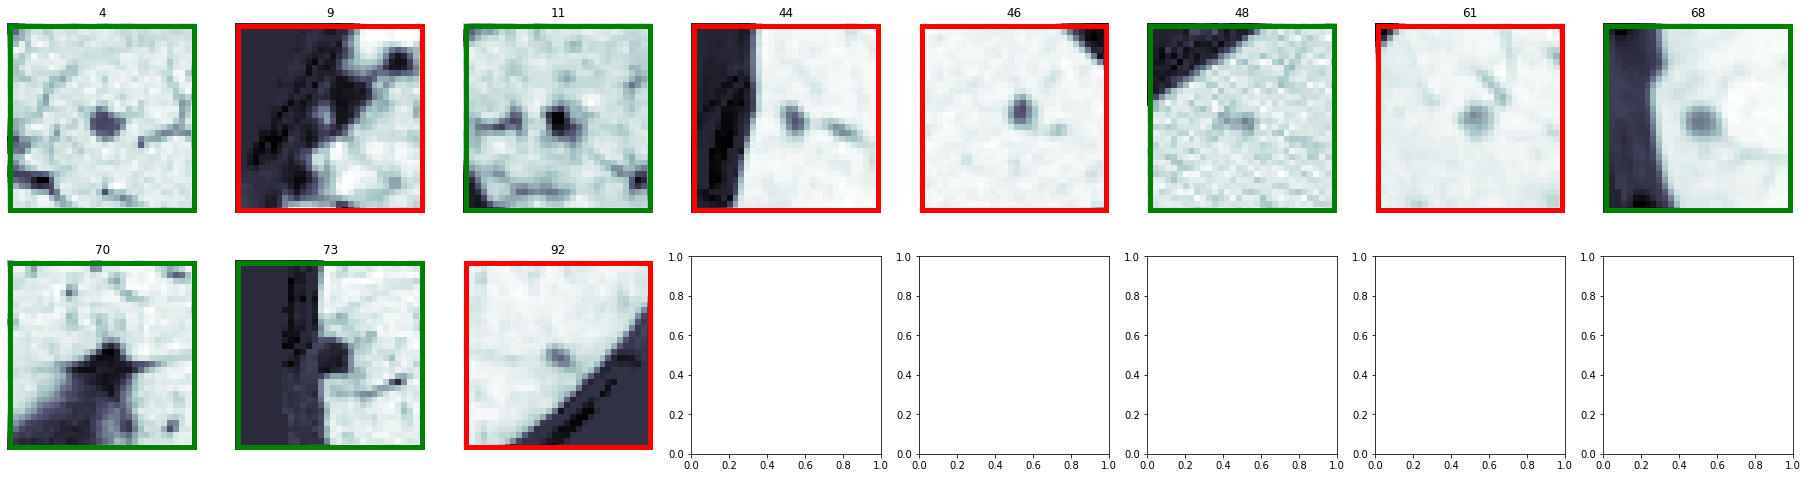

<Figure size 432x288 with 0 Axes>

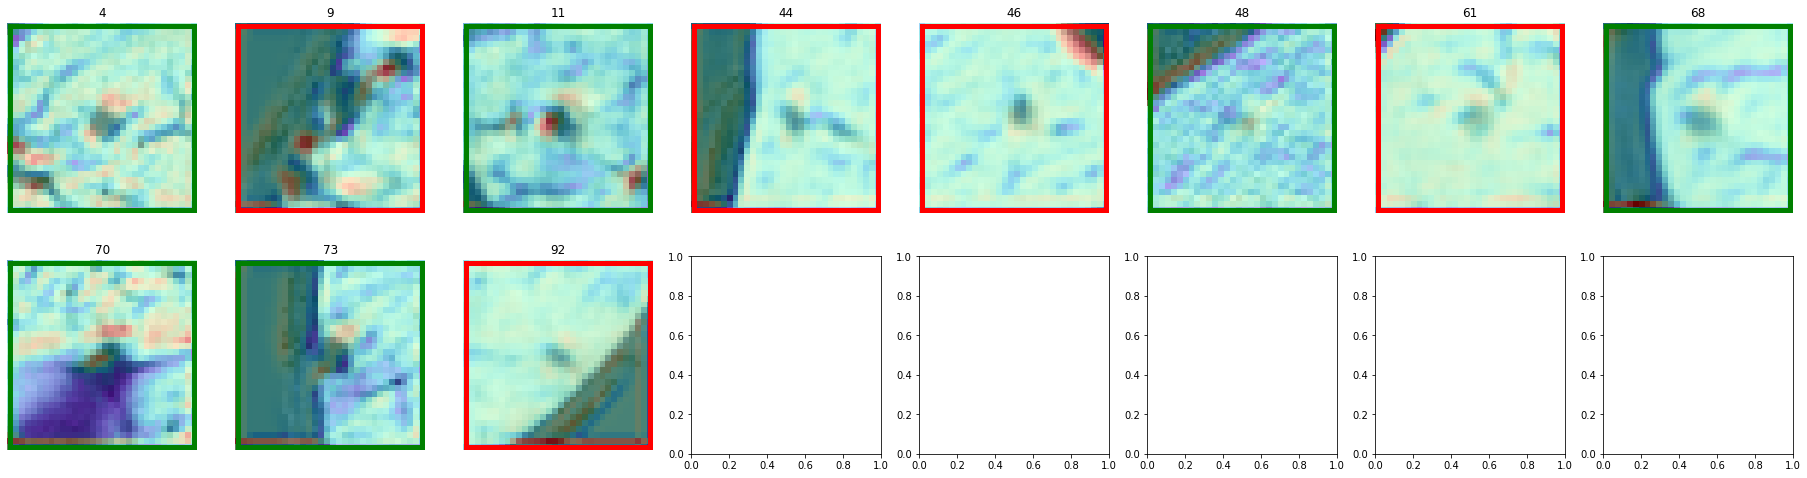

In [13]:
plot_imgs_grid(plot_feature_vector, incorrect_preds, feats, preds, gts, nrows = 2, ncols=8)
plot_imgs_grid(plot_nodule_img,  incorrect_preds, nod_ids, gts, nrows=2, ncols=8)
plot_imgs_grid(plot_nodule_sp_attention, incorrect_preds, nod_ids, gts, sp_attn_maps, nrows=2, ncols=8)

In [208]:
from scipy.special import softmax
def get_softmax(z):
    return np.apply_along_axis(softmax, 2, z)
get_softmax(preds_all_views)[:,18]

array([[0.01146008, 0.98853976],
       [0.00800742, 0.99199265],
       [0.01245633, 0.98754376],
       [0.01072061, 0.9892794 ]], dtype=float32)

In [209]:
preds_multi_views = preds_all_views.max(axis=0).argmax(axis=1)
incorrect_preds_2 = np.where(gts != preds_multi_views)[0]
print(preds_multi_views)
print(len(incorrect_preds_2))

[1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1]
16
